In [1]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# training sample size N, test size N_test, process repitition M
N = 100
N_test = 20
M = 10

def Y(x):
    # f(x) + errors
    f = 3 * (np.sin(x) ** 2) * np.cos(x) + np.sin(x)
    return f + np.random.normal(0, 0.01, size=len(x))

def draw_data(N, N_test, sparsity=10):
    low = 0
    high = sparsity * np.pi

    X_train = np.random.uniform(low=low, high=high, size=N)
    X_test = np.random.uniform(low=low, high=high, size=N_test)
    
    Y_train = Y(X_train)
    Y_test = Y(X_test)
    
    return ((X_train, Y_train), (X_test, Y_test))

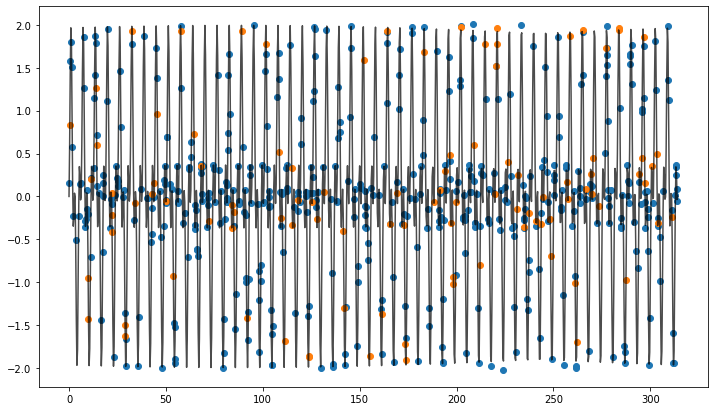

In [3]:
(X_train1, Y_train1), (X_test1, Y_test1) = draw_data(500, 100, sparsity=100)

x_true = np.linspace(0, 100 * np.pi, 1000)
y_true = 3 * (np.sin(x_true) ** 2) * np.cos(x_true) + np.sin(x_true)

plt.figure(figsize=(12, 7))
plt.plot(x_true, y_true, "black", alpha = 0.7)
plt.scatter(X_train1, Y_train1)
plt.scatter(X_test1, Y_test1)

In [14]:
mse_compare = []
for i in range(20):
    mse_1nn_lst = []
    mse_2nn_lst = []
    for rep in range(50):
        # draw N training sample from (X, Y) and N_test testing sample
        (X_train, Y_train), (X_test, Y_test) = draw_data(500, 100, sparsity=100)

        X_train = np.array(X_train).reshape(-1, 1)
        X_test = np.array(X_test).reshape(-1, 1)
        # train 1nn and 2nn model on training
        # Create the 1nn and 2nn models.
        knn1 = KNeighborsRegressor(n_neighbors=1)
        knn2 = KNeighborsRegressor(n_neighbors=2)
        # Fit the model on the training data.
        knn1.fit(X_train, Y_train)
        knn2.fit(X_train, Y_train)

        # Make point predictions on the test set using the fit model.
        predictions_1nn = knn1.predict(X_test)
        predictions_2nn = knn2.predict(X_test)

        # calculate prediction error on N_test set (MSE over test set)
        mse_1nn = (((predictions_1nn - Y_test) ** 2).sum()) / len(predictions_1nn)
        mse_2nn = (((predictions_2nn - Y_test) ** 2).sum()) / len(predictions_2nn)
        mse_1nn_lst.append(mse_1nn)
        mse_2nn_lst.append(mse_2nn)
        
    se_1nn = np.std(mse_1nn_lst) / M
    se_2nn = np.std(mse_2nn_lst) / M
    final_val_1nn = np.mean(mse_1nn_lst) + 2 * se_1nn
    final_val_2nn = np.mean(mse_2nn_lst) - 2 * se_2nn
    mse_compare.append(final_val_1nn - final_val_2nn) # we want to see negative numbers
    

# NEED TO DO SOMETHING WITH SE???
# We want the estimated expected squared error of 1-NN + 2(SE) to be < the expected squared error of 2-NN - 2(SE)

In [9]:
se_1nn = np.std(mse_1nn_lst) 
se_2nn = np.std(mse_2nn_lst) 
final_val_1nn = np.mean(mse_1nn_lst) + 2 * se_1nn
final_val_2nn = np.mean(mse_2nn_lst) - 2 * se_2nn

# We want final_val_1nn < final_val_2nn
final_val_1nn, final_val_2nn

(0.5713575594449191, 0.30141548356712233)

In [15]:
mse_compare, np.mean(mse_compare)
# Nice - all negative meaning that we found a solution where 1NN works better than 2NN
# N = 500, N_test = 100, M = 50, (X, Y) from 3 * (np.sin(x) ** 2) * np.cos(x) + np.sin(x) + np.random.normal(0, 0.01, size=len(x))

([0.2723899528246676,
  0.36822081128993933,
  0.28845813617002075,
  0.33471342436135826,
  0.3339428909106417,
  0.3147353887270449,
  0.3296506224574316,
  0.4225195965128785,
  0.35833974070940566,
  0.2834354769638583,
  0.3705424832033969,
  0.21369803498849044,
  0.22824387412200264,
  0.2782183627982905,
  0.29648754679867056,
  0.2670868264995967,
  0.2835168852746768,
  0.3016639138336791,
  0.2688107194423439,
  0.2864873876611251],
 0.30505810377747594)

We found $N = 500, N_{test} = 100, M = 50$ and $(X, Y)$ is drawn from from $3 sin(x)^2 cos(x) + sin(x) + \epsilon$ where $\epsilon \sim \mathcal{N}(0, .0001)$.